## Headplot
Also known as topomap, plots the values of a channel setup. In this case a 19-channel 10-20 setup.

In [1]:
using Plots
pyplot()

  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31


Plots.PyPlotBackend()

## Head plot
Start with a regular grid:


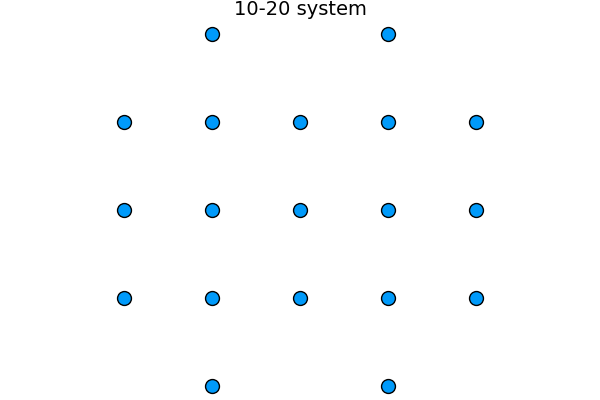

In [2]:
locations =[1 4; # FP1
            3 4; # FP2
            1 3; # F3
            3 3; # F4
            2 3; # FZ
            1 2; # C3
            3 2; # C4
            2 2; # CZ
            1 1; # P3
            3 1; # P4
            2 1; # PZ
            1 0; # O1
            3 0; # O2
            0 3; # F7
            4 3; # F8
            0 2; # T3
            4 2; # T4
            0 1; # T5
            4 1];# T6
scatter(locations[:,1],
    locations[:,2],
    label="",
    ms=10,
    aspect_ratio=1,
    title="10-20 system",
    ticks=nothing,
    grid=nothing,
    border=false)

Bend the electrodes to simulate a projection


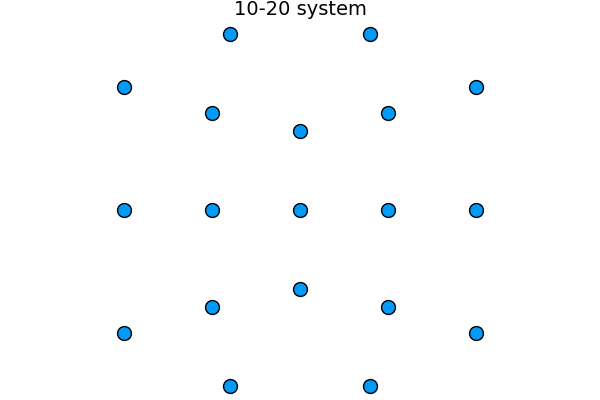

In [3]:
locations =[1+.2 4   ; # FP1
            3-.2 4   ; # FP2
            1    3+.1; # F3
            3    3+.1; # F4
            2    3-.1; # FZ
            1    2   ; # C3
            3    2   ; # C4
            2    2   ; # CZ
            1    1-.1; # P3
            3    1-.1; # P4
            2    1+.1; # PZ
            1+.2 0   ; # O1
            3-.2 0   ; # O2
            0    3+.4; # F7
            4    3+.4; # F8
            0    2   ; # T3
            4    2   ; # T4
            0    1-.4; # T5
            4    1-.4];# T6
scatter(locations[:,1],
    locations[:,2],
    label="",
    ms=10,
    aspect_ratio=1,
    title="10-20 system",
    ticks=nothing,
    grid=nothing,
    border=false)

Scale from 0 to 1 to normalize plot

In [4]:
locations = locations ./maximum(locations) # Normalize


19×2 Array{Float64,2}:
 0.3   1.0  
 0.7   1.0  
 0.25  0.775
 0.75  0.775
 0.5   0.725
 0.25  0.5  
 0.75  0.5  
 0.5   0.5  
 0.25  0.225
 0.75  0.225
 0.5   0.275
 0.3   0.0  
 0.7   0.0  
 0.0   0.85 
 1.0   0.85 
 0.0   0.5  
 1.0   0.5  
 0.0   0.15 
 1.0   0.15 

Create channel setup with x coordinate, y coordinate, and name.

In [5]:
channels = ["FP1" "FP2" "F3" "F4" "FZ" "C3" "C4" "CZ" "P3" "P4" "PZ" "O1" "O2" "F7" "F8" "T3" "T4" "T5" "T6"][:];
ch_setup = [locations channels]

19×3 Array{Any,2}:
 0.3   1.0    "FP1"
 0.7   1.0    "FP2"
 0.25  0.775  "F3" 
 0.75  0.775  "F4" 
 0.5   0.725  "FZ" 
 0.25  0.5    "C3" 
 0.75  0.5    "C4" 
 0.5   0.5    "CZ" 
 0.25  0.225  "P3" 
 0.75  0.225  "P4" 
 0.5   0.275  "PZ" 
 0.3   0.0    "O1" 
 0.7   0.0    "O2" 
 0.0   0.85   "F7" 
 1.0   0.85   "F8" 
 0.0   0.5    "T3" 
 1.0   0.5    "T4" 
 0.0   0.15   "T5" 
 1.0   0.15   "T6" 

In [6]:
# Fake power array
z = [9.95184937,   9.87947708,   9.87628496,   9.78414422,
         9.79365258,   9.96168969,   9.87537519,   9.74536093,
        10.16686878,  10.04425475,  10.10444126,  10.2917172 ,
        10.16745917,  10.0235203 ,   9.89914   ,  10.11263505,
         9.99756449,  10.17861254,  10.04704248];
x = locations[:,1];
y = locations[:,2];

## Interpolation plot


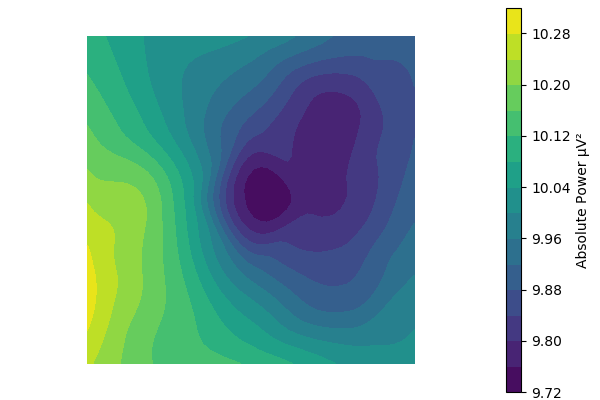

In [7]:
import GR.gridit
ncols = 50 # number of columns to interpolate
nrows = 50 # number of rows to interpolate

frame = .1 # 10% frame
xlims = (minimum(x)-frame,
    maximum(x)+frame)
ylims = (minimum(y)-frame,
    maximum(y)+frame)

xi, yi, zi = gridit(x, y, z, ncols, nrows) # interpolate values
Z = reshape(zi,nrows,ncols)
p1 = contour(xi,yi,Z,fill=true,
    aspect_ratio=1,
    colorbar_title="Absolute Power µV²",
    ticks=nothing,
    grid=nothing,
    seriescolor=:viridis,
    border=false,
    xlims=xlims,
    ylims=ylims)

## Electrodes plot


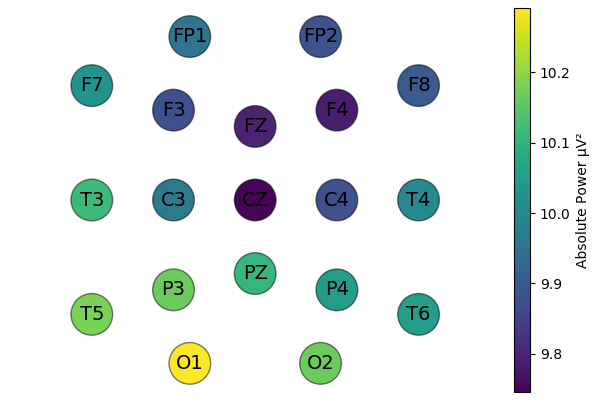

In [8]:
p2 = scatter(x,y,
    zcolor=z,
    label="",
    m=(:viridis,0.99,stroke(.5,:black)),
#     m=(:default,0.99,stroke(.5,:black)),
    ms=30,
    aspect_ratio=1,
    colorbar_title="Absolute Power µV²",
    ticks=nothing,
    grid=nothing,
    border=false,
    xlims=xlims,
    ylims=ylims,
    series_annotations=channels)

## Joined plots


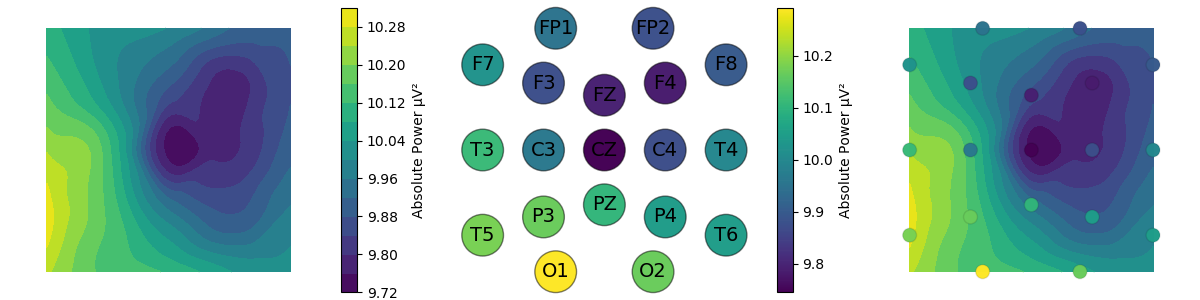

In [11]:
p3 = contour(xi,
    yi,
    Z,
    fill=true,
    aspect_ratio=1,
    ticks=nothing,
    grid=nothing,
    border=false,
    cbar=false,
    seriescolor=:viridis,
#     colorbar_title="Power µV²",
    foreground_color_grid=false,
    xlims=xlims,
    ylims=ylims)
#     size=(600,400))
scatter!(x,
    y,
    zcolor=z,
    label="",
    m=(:viridis,0.99,stroke(.1,:black)),
    ms=10,
    aspect_ratio=1,
#     cbar=true,
    ticks=nothing,
    grid=nothing,
    border=false,
    xlims=xlims,
    ylims=ylims)
#     series_annotations=channels,
#     size=(600,400))

plot(p1,p2,p3, size=(1200,300), layout = (1,3))



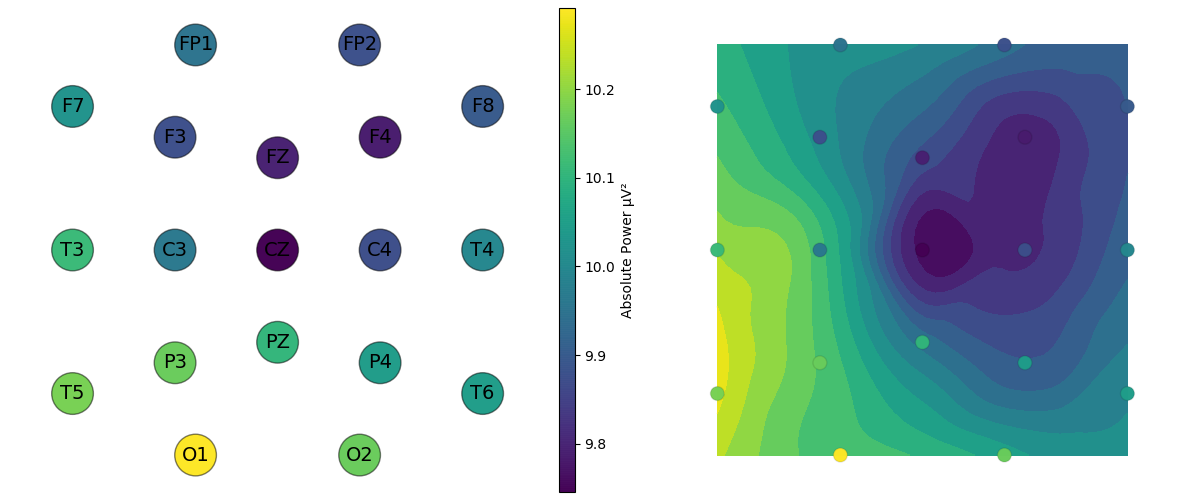

In [12]:
plot(p2,p3, size=(1200,500))